In [1]:


import pandas as pd
# import the dataset from Sklearn
from sklearn.datasets import load_breast_cancer


# Read the DataFrame, first using the feature data
data = load_breast_cancer() 
df = pd.DataFrame(data.data, columns=data.feature_names)

# Add a target column, and fill it with the target data
df['target'] = data.target

# Show the first five rows
print(df.head())






   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

In [2]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Set up the data for modelling 
# define Y 
y=df['target'].to_frame() 
# define X df.columns.difference removes the specified column
X=df[df.columns.difference(['target'])] 
 # create train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)


# build model - Xgboost

# build classifier
xgb_mod=xgb.XGBClassifier(random_state=101, gpu_id=0, use_label_encoder = False)
#values.ravel() compresses any array to 1D Array 
#print(y_train.values.ravel())
xgb_mod=xgb_mod.fit(X_train,y_train.values.ravel())   

#print(xgb_mod)


# make prediction and check model accuracy 
y_pred = xgb_mod.predict(X_test)

#print(y_pred)

#probable question : What if we change the dataset to Influenza Dataset?

# Performance
#Actual Prediction Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 98.25%


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


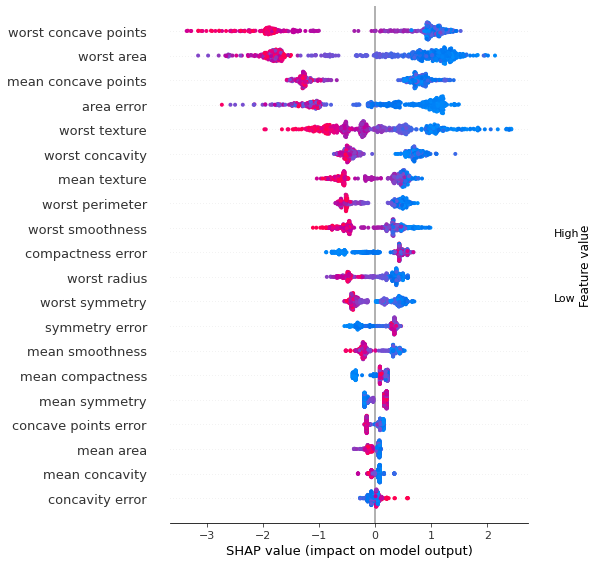

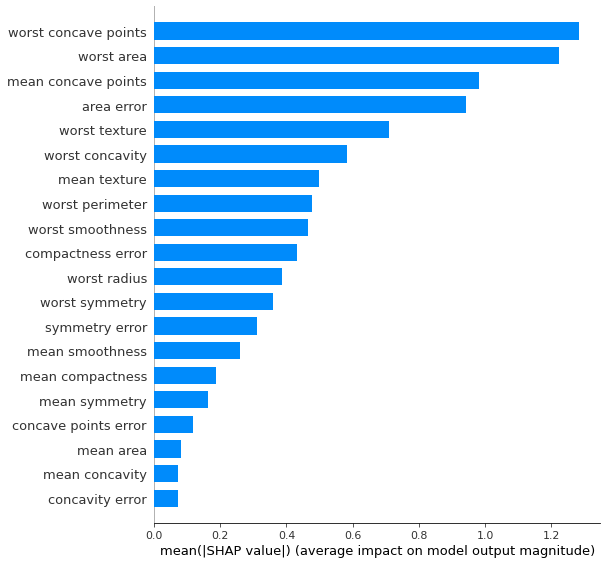

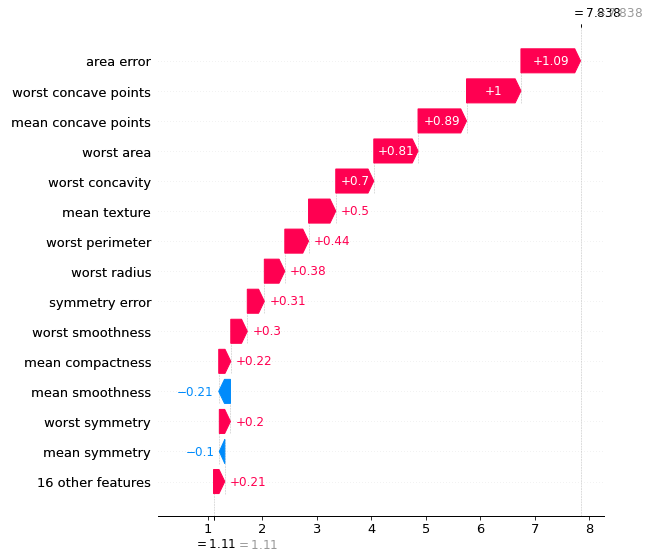

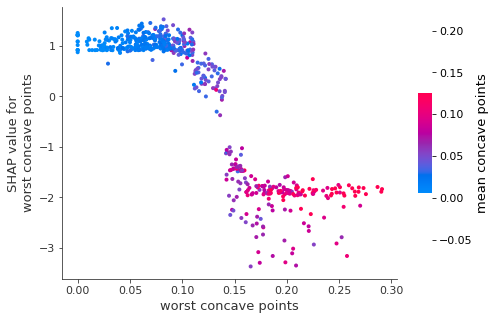

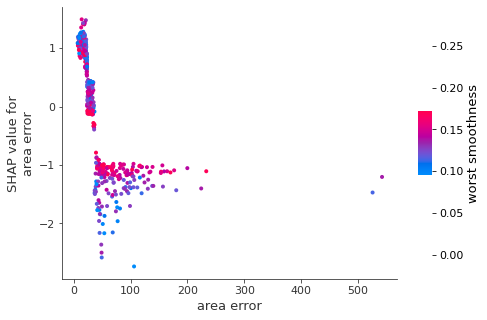

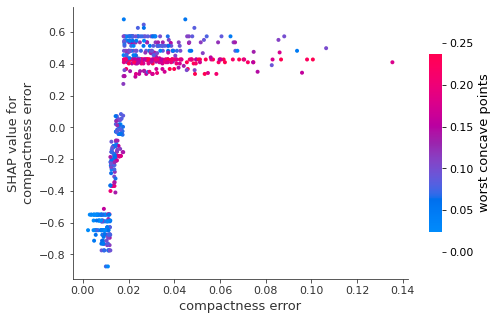

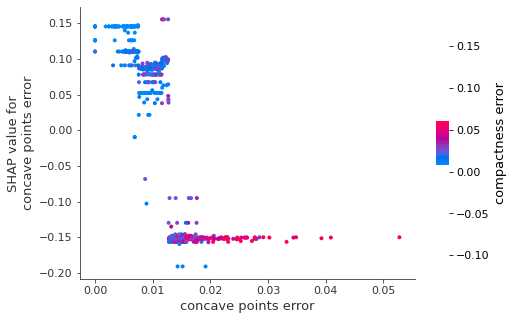

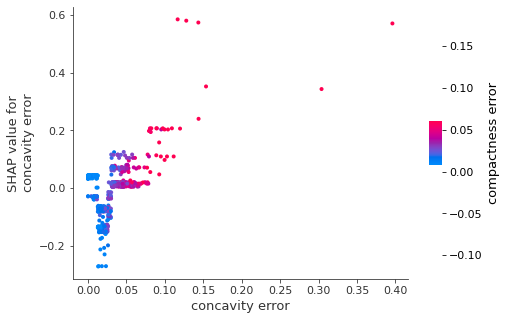

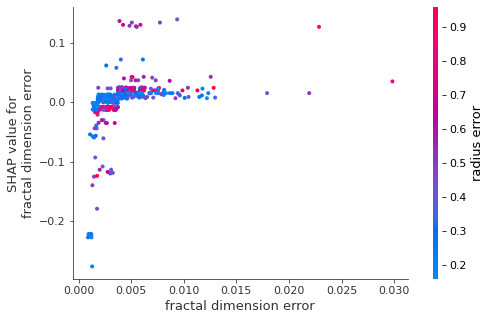

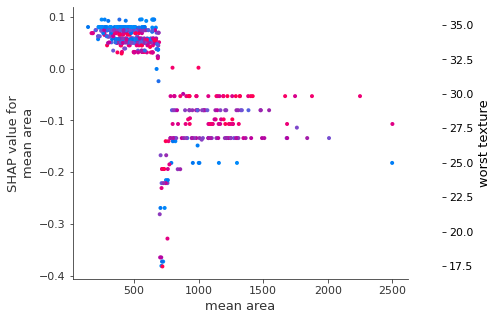

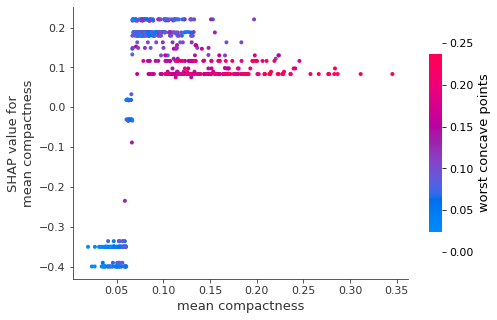

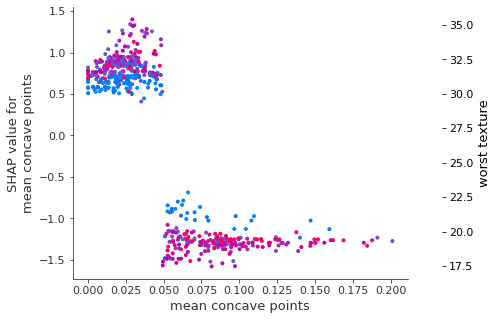

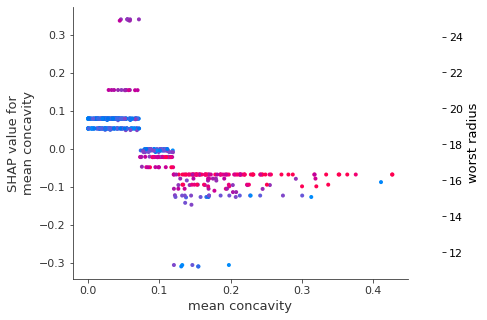

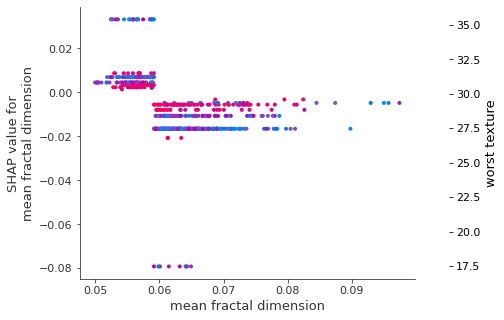

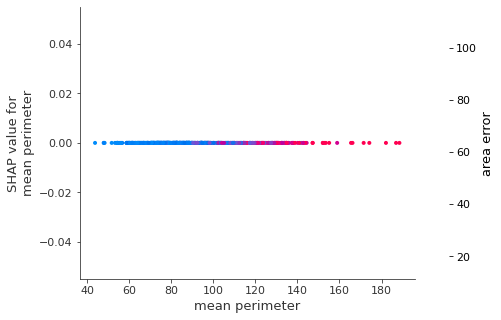

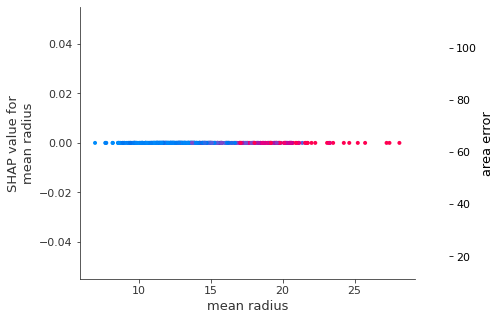

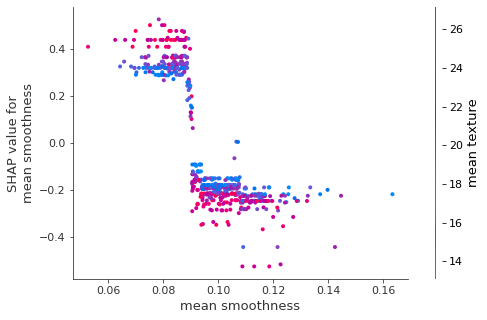

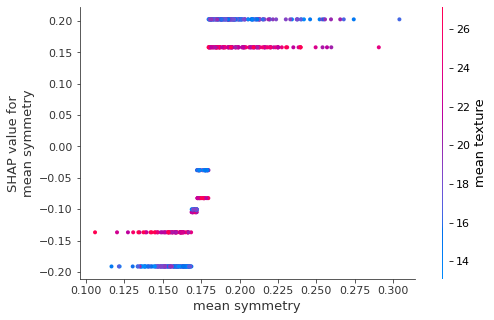

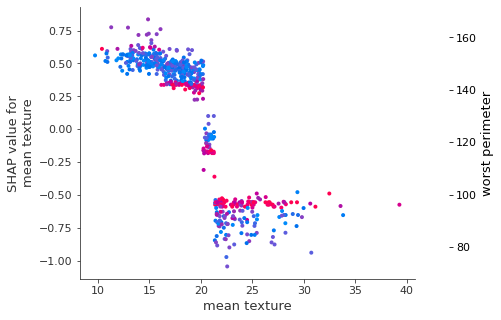

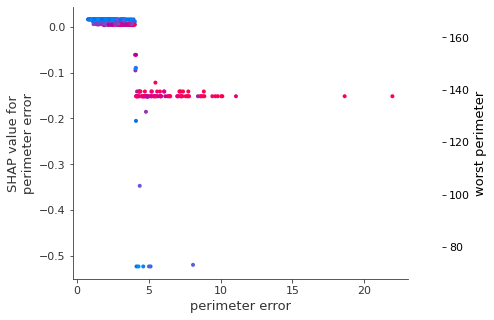

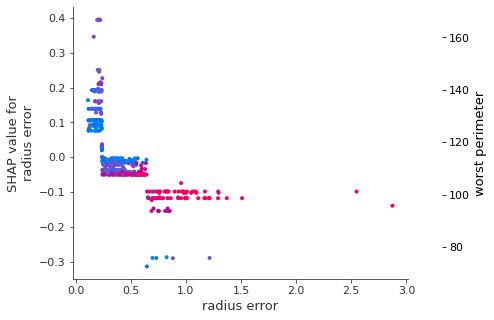

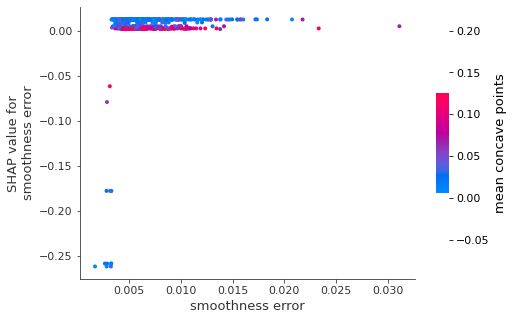

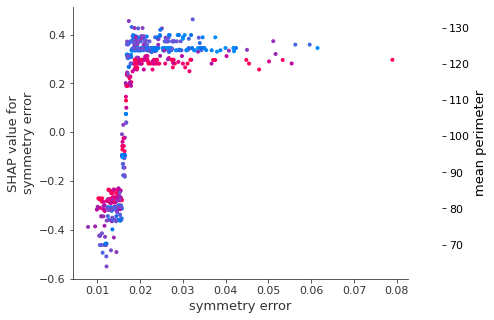

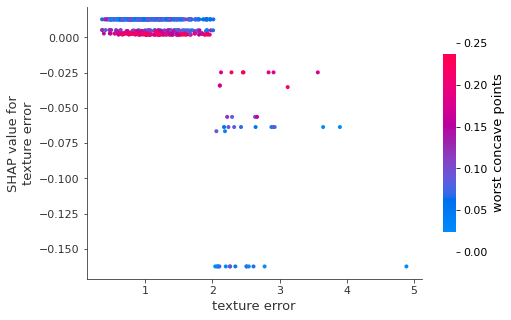

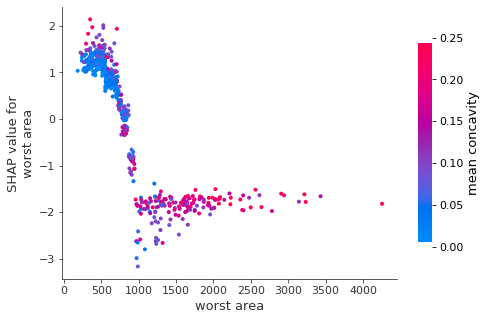

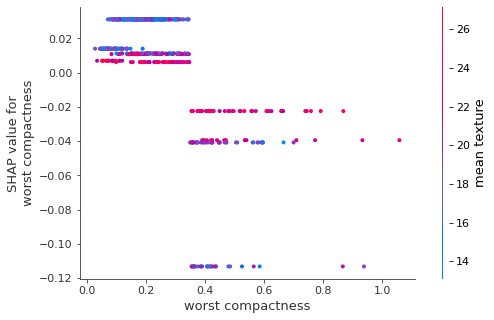

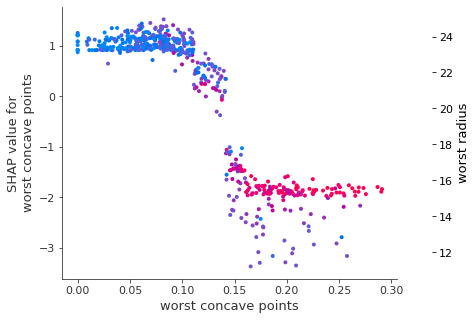

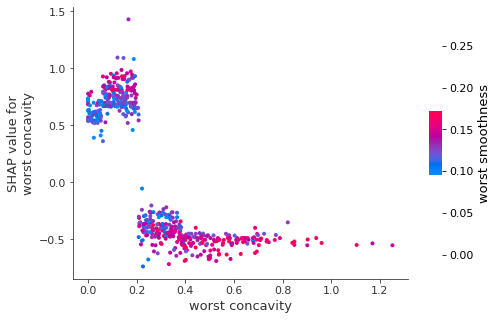

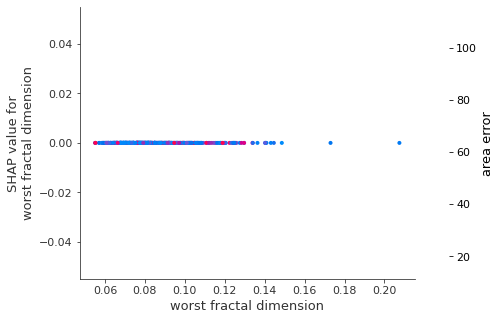

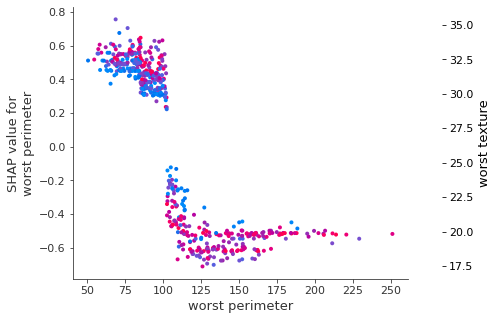

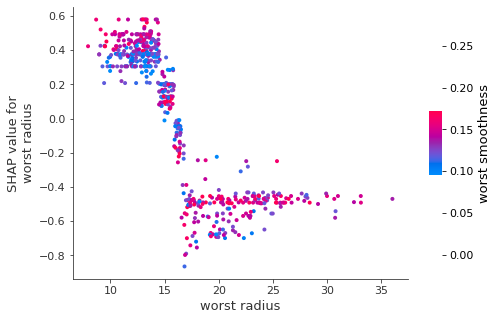

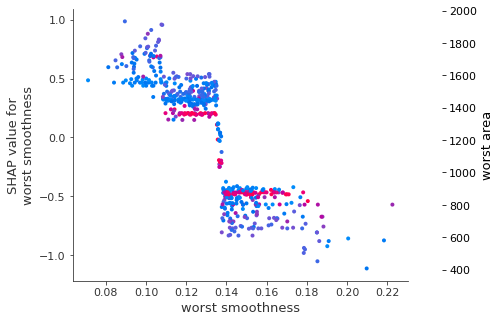

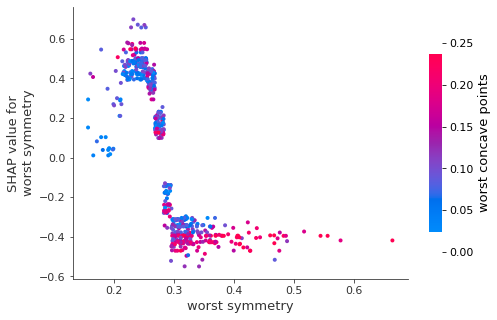

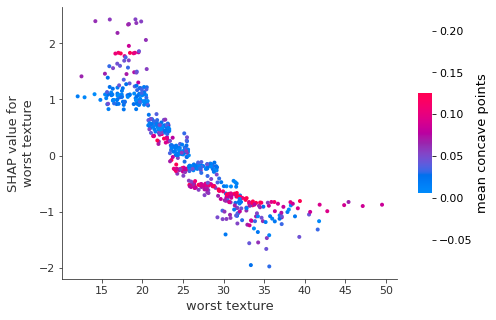

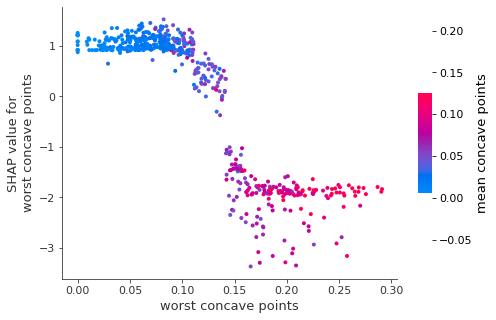

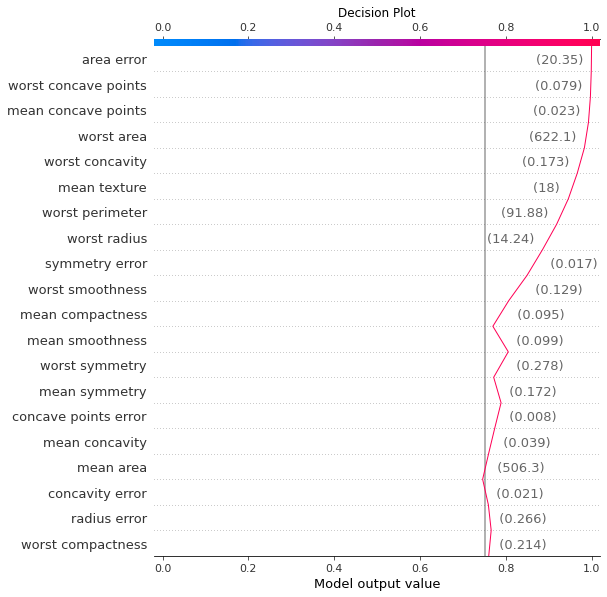

In [3]:
import shap

# Generate the Tree explainer and SHAP values
explainer = shap.TreeExplainer(xgb_mod)
shap_values = explainer.shap_values(X)
expected_value = explainer.expected_value

############## visualizations #############
# Generate summary dot plot
shap.summary_plot(shap_values, X,title="SHAP summary plot") 

# Generate summary bar plot 
shap.summary_plot(shap_values, X,plot_type="bar") 

# Generate waterfall plot  
shap.plots._waterfall.waterfall_legacy(expected_value, shap_values[79], features=X.loc[79,:], feature_names=X.columns, max_display=15, show=True)

# Generate dependence plot
shap.dependence_plot("worst concave points", shap_values, X, interaction_index="mean concave points")

# Generate multiple dependence plots
for name in X_train.columns:
     shap.dependence_plot(name, shap_values, X)
shap.dependence_plot("worst concave points", shap_values, X, interaction_index="mean concave points")

# Generate force plot - Multiple rows 
shap.force_plot(explainer.expected_value, shap_values[:100,:], X.iloc[:100,:])

# Generate force plot - Single
shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:])

# Generate Decision plot 
shap.decision_plot(expected_value, shap_values[79],link='logit' ,features=X.loc[79,:], feature_names=(X.columns.tolist()),show=True,title="Decision Plot")

In [4]:
import lime
import numpy as np
import lime.lime_tabular
import xgboost 

############## create explainer ###########
# we use the dataframes splits created above for SHAP
explainer = lime.lime_tabular.LimeTabularExplainer(X_test.to_numpy(), feature_names=X_test.columns, class_names=['0','1'], verbose=True)

############## visX_np = X_test.to_numpy()ualizations #############
X_np = X_train.to_numpy()
exp = explainer.explain_instance(X_np[5], xgb_mod.predict_proba, num_features=20)
exp.show_in_notebook(show_table=True)


Intercept 0.9862754420793507
Prediction_local [-0.21610067]
Right: 0.00035833908
